In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [64]:
import pytesseract
from pytesseract import image_to_string

In [15]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install ISR --no-deps

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install opencv-contrib-python==4.5.5.62

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import time
import uuid
from PIL import Image
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T

In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [24]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [25]:
# img = 'G:/CSE_498r/project/dataset/images/DSC_0460.JPG'

In [26]:
# result = model(img)
# result.print()

In [27]:
# %matplotlib inline 
# plt.imshow(np.squeeze(result.render()))
# plt.show()

In [28]:
# !cd yolov5 && python train.py --img 640 --batch 32 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [29]:
# !cd yolov5 && python train.py --img 640 --batch 12 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2 --device 1

In [30]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp22/weights/last.pt')

Using cache found in C:\Users\broth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-29 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [31]:
#image = cv2.imread('G:/CSE_498r/project/g_MG_0806.JPG')
image = cv2.imread('g_MG_0806.JPG')

In [32]:
result = model01(image)
result.print()

image 1/1: 3456x5184 1 license-plate
Speed: 5.0ms pre-process, 183.5ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


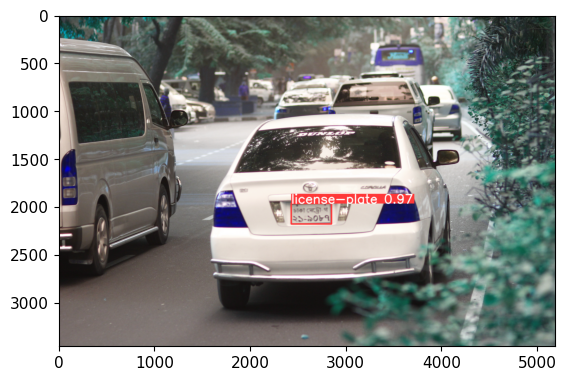

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [34]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,2427.9104,1967.391724,2848.901855,2181.733887,0.966565,0,license-plate


In [35]:
location = result.xyxy[0][0]
location_arr = []

In [36]:
for bound in location:
    location_arr.append(int(bound.item()))

In [37]:
location_arr

[2427, 1967, 2848, 2181, 0, 0]

In [38]:
location_arr = location_arr[:4]

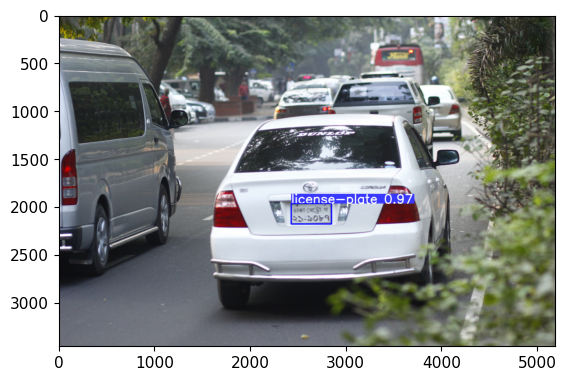

In [39]:
ncopy_img  = image.copy()
cv2.rectangle(ncopy_img, (location_arr[0], location_arr[1]), (location_arr[2], location_arr[3]), (255,0,0), 5)

%matplotlib inline 

plt.imshow(cv2.cvtColor(ncopy_img, cv2.COLOR_BGR2RGB))


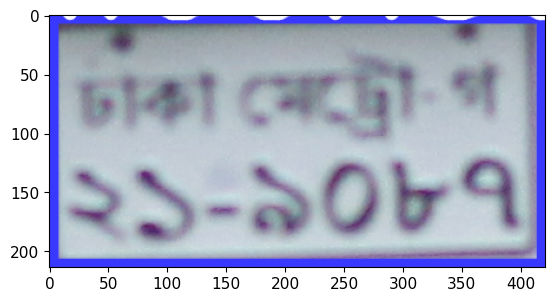

In [40]:
cropped_image  = image[location_arr[1]:location_arr[3], location_arr[0]:location_arr[2]]

%matplotlib inline 

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



1/1 [==============================] - 4s 4s/step


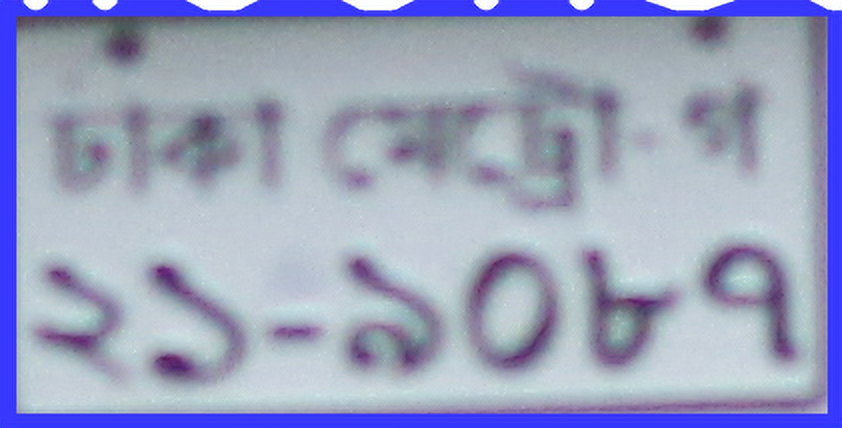

In [41]:
#Image upscaling using ISR


from ISR.models import RDN

img = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2BGR)
lr_img = np.array(img)

rdn = RDN(weights='psnr-small')
sr_img = rdn.predict(lr_img)
Image.fromarray(sr_img)

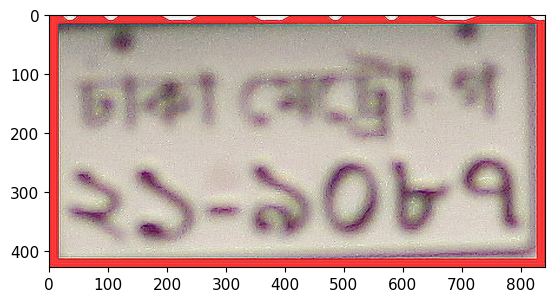

In [42]:
# Sharp process 1

filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function
sharpen_img = cv2.filter2D(sr_img,-1,filter)
plt.imshow(cv2.cvtColor(sharpen_img, cv2.COLOR_BGR2RGB))

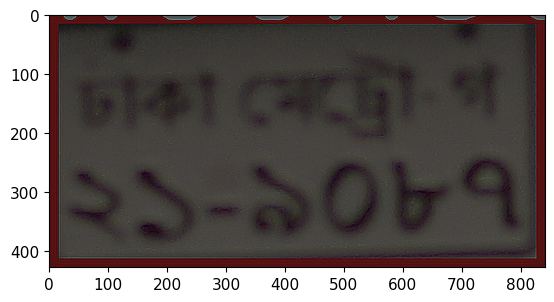

In [43]:
# sharp process 2

kernel = np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]], np.float32) 

kernel = 1/3 * kernel

shrp_img = cv2.filter2D(sr_img, -1, kernel)
plt.imshow(cv2.cvtColor(shrp_img, cv2.COLOR_BGR2RGB))

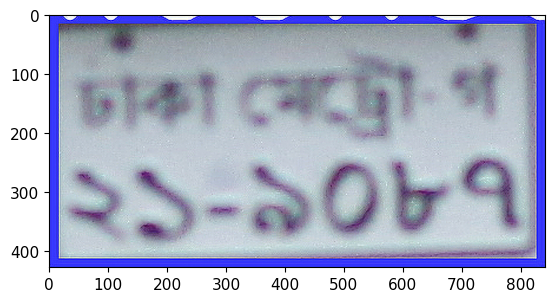

In [44]:
# sharp process 3 using PIL and Tensorflow sharpening 

img_pil = T.ToPILImage()(sr_img)
sharp_pil = F.adjust_sharpness(img_pil, 7.0) #tweak this
sharp_img = cv2.cvtColor(np.array(sharp_pil), cv2.COLOR_RGB2BGR)
plt.imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB))

In [100]:
filename = 'test2ocr.jpg'

True

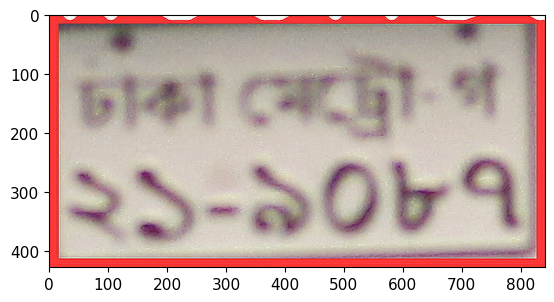

In [101]:
# sharp process 4

sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharped_img = cv2.filter2D(sr_img, -1, sharpen_filter)
plt.imshow(cv2.cvtColor(sharped_img, cv2.COLOR_BGR2RGB))
cv2.imwrite(filename, sharped_img)

True

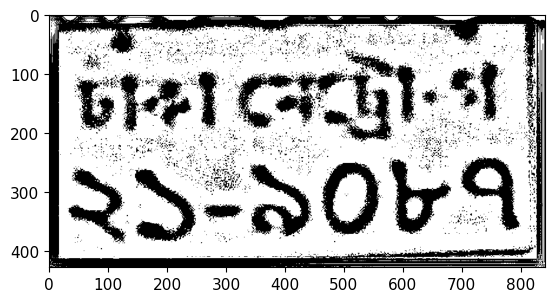

In [103]:
# using adaptive threshold (not good enough)

cropped = cv2.cvtColor(sharped_img, cv2.COLOR_BGR2GRAY)
adaptive = cv2.adaptiveThreshold(cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 81,5)
plt.imshow(cv2.cvtColor(adaptive, cv2.COLOR_BGR2RGB))
cv2.imwrite(filename, adaptive)

In [108]:
reader = easyocr.Reader(['bn'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [110]:
#EASYocr
#result = reader.readtext(cropped_img)
result = reader.readtext(sharped_img, detail=1, paragraph=True) #change img variable from here
print(result)

[[[[16, 62], [811, 62], [811, 406], [16, 406]], 'ঢা4া নেড্রেৌগ ২১-৯০৮৭']]


In [106]:
#pytesseract Bangla OCR
pyimg = cv2.imread('test2ocr.jpg')

# Adding custom options
custom_config = r'-l ben --psm 6 --oem 3'
pytesseract.image_to_string(pyimg, config=custom_config)

#sharped_img detecting the number and cant detect the text
#adaptive detect the text but cant detech the number

'ঢাকা নেট্রো-গ\n'

In [ ]:
x = location.xcenter[0]
y = location.ycenter[0]
w = location.width[0]
h = location.height[0]

In [ ]:
x

In [ ]:
cropped_image = torchvision.transforms.functional.crop(image, x, y, h, w)

cropped_image = torchvision.transforms.functional.crop(img: image, top: x, left: y, height: h, width: w)

In [ ]:
print(xmin[0])

In [ ]:
(x1, y1) = (np.min(xmin), np.min(ymin))
(x2, y2) = (np.max(xmax), np.max(ymax))

cropped_img = img[x1:x2+1, y1:y2+1]

In [ ]:
# result.save(save_dir='G:/CSE_498r/project2/')

In [ ]:
# torch.save(model01, 'G:/CSE_498r/project/model.py')
path = "G:/CSE_498r/project/vid_test02.mp4"

In [ ]:
# !cd yolov5 && python model01 --source path

In [ ]:
# Open the video
cap = cv2.VideoCapture("vid_test02.mp4")
ret, frame = cap.read()

cap.release()
    

In [ ]:
result = model01(frame)

In [ ]:
result.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
result.crop(save=True, save_dir='G:/CSE_498r/project/test_vid', exist_ok=False)

In [ ]:
# ret, frame = cap.read()

# cap.release()
    
# plt.imshow(frame[:,:,::-1]) # OpenCV uses BGR, whereas matplotlib uses RGB
# plt.show()


In [ ]:

# # Get the frames per second (fps) of the video
# fps = cap.get(cv2.CAP_PROP_FPS)

# # Define the codec and create a video writer object
# # fourcc = cv2.VideoWriter_fourcc(*"mp4v")
# # out = cv2.VideoWriter("output.mp4", fourcc, fps, (640, 352))

# # Loop through each frame of the video
# while cap.isOpened():
#     # Read the next frame
#     ret, frame = cap.read()

#     # Break if the video has ended
#     if not ret:
#         break

#     # Preprocess the frame
# #     frame = preprocess(frame)

#     # Convert the frame to a PyTorch tensor
#     frame = torch.from_numpy(frame).unsqueeze(0)

#     # Run the frame through the model
#     output = model01(frame)

#     # Postprocess the output
#     output = postprocess(output)

#     # Write the output frame to the video
#     out.write(output)

# # Release the video objects
# cap.release()
# out.release()